In [ ]:
# Name == Sarat
# Roll No == S20200010107
# Assignent == 6

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [2]:
def generate_normal(num_samples, mean1, mean2, cov):
    a = np.random.multivariate_normal(mean1, cov, int(num_samples/2))
    b = np.random.multivariate_normal(mean2, cov, int(num_samples/2))
    z1 = np.zeros((int(num_samples/2),1))
    z2 = np.ones((int(num_samples/2),1))

#     z = np.vstack((a[:,0],a[:,1],z1.T))
    d = np.concatenate((np.vstack((a[:,0],a[:,1],z1.T)).T, np.vstack((b[:,0],b[:,1],z2.T)).T))
    
    d = np.array(d)
    np.random.shuffle(d)
    
    return d

In [3]:
mean1 = [0,0]
mean2 = [0,2]
cov = [[1,0],[0,1]]

In [21]:
dataset = generate_normal(5500,mean1, mean2, cov)

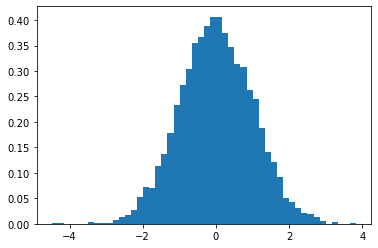

In [22]:
count, bins, ignored = plt.hist(dataset[:,0], 50, density=True)
plt.show()

In [23]:
d1 = dataset[0:100,:]
d2 = dataset[100:300]
d3 = dataset[300:600]
d4 = dataset[600:1000]
d5 = dataset[1000:1500]
d6 = dataset[1500:2100]
d7 = dataset[2100:2800]
d8 = dataset[2800:3600]
d9 = dataset[3600:4500]
d10 = dataset[4500:5500]

In [24]:
test = generate_normal(100, mean1,mean2, cov)

In [25]:
# print(train[:,0:2].reshape(-1,1).shape)
from sklearn.neighbors import KNeighborsClassifier

In [26]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(d1[:,0:2].reshape(-1, 2), d1[:,2])

neigh2 = KNeighborsClassifier(n_neighbors=1)
neigh2.fit(d2[:,0:2].reshape(-1, 2), d2[:,2])

neigh3 = KNeighborsClassifier(n_neighbors=1)
neigh3.fit(d3[:,0:2].reshape(-1, 2), d3[:,2])

neigh4 = KNeighborsClassifier(n_neighbors=1)
neigh4.fit(d4[:,0:2].reshape(-1, 2), d4[:,2])

neigh5 = KNeighborsClassifier(n_neighbors=1)
neigh5.fit(d5[:,0:2].reshape(-1, 2), d5[:,2])

neigh6 = KNeighborsClassifier(n_neighbors=1)
neigh6.fit(d6[:,0:2].reshape(-1, 2), d6[:,2])

neigh7 = KNeighborsClassifier(n_neighbors=1)
neigh7.fit(d7[:,0:2].reshape(-1, 2), d7[:,2])

neigh8 = KNeighborsClassifier(n_neighbors=1)
neigh8.fit(d8[:,0:2].reshape(-1, 2), d8[:,2])

neigh9 = KNeighborsClassifier(n_neighbors=1)
neigh9.fit(d9[:,0:2].reshape(-1, 2), d9[:,2])

neigh10 = KNeighborsClassifier(n_neighbors=1)
neigh10.fit(d10[:,0:2].reshape(-1, 2), d10[:,2])

KNeighborsClassifier(n_neighbors=1)

In [27]:
def predict_nnc(sample, num):
    if num ==1:
        a = neigh1.predict(sample)
    if num ==2:
        a = neigh2.predict(sample)
    if num ==3:
        a = neigh3.predict(sample)
    if num ==4:
        a = neigh4.predict(sample)
    if num ==5:
        a = neigh5.predict(sample)
    if num ==6:
        a = neigh6.predict(sample)
    if num ==7:
        a = neigh7.predict(sample)
    if num ==8:
        a = neigh8.predict(sample)
    if num ==9:
        a = neigh9.predict(sample)
    if num ==10:
        a = neigh10.predict(sample)
    return a

In [34]:
a = neigh1.predict(test[:,0:2].reshape(-1,2))

In [35]:
# print(test)

In [36]:
count=0
for i in range(100):
    if a[i]==test[i,2]:
        count+=1
print(count)
print(f'accuracy = {count/100}')

75
accuracy = 0.75


In [39]:
def density_using_gausian(x):
    mean_1 = np.array([0,0])
    mean_2 = np.array([0,2])
    
    exp_1 = np.sum(np.square(x-mean_1)*(-0.5))
    exp_2 = np.sum(np.square(x-mean_2)*(-0.5))
    temp_1 = np.exp(exp_1)/(2*np.pi)
    temp_2 = np.exp(exp_2)/(2*np.pi)
    return [temp_1, temp_2]

In [40]:
ystar = []
test_copy = test.copy() 

for i in range(len(test_copy)):
    probabilities = density_using_gausian(test_copy[i][2])
    if(probabilities[0]>probabilities[1]):
        ystar.append(0)
    else:
        ystar.append(1)

In [41]:
def bias_calculator(a, ystar):
    count = 0
    for i in range(len(a)):
        if(a[i]!=ystar[i]):
            count+=1
    return count/len(a)

In [44]:
bias = []

for i in range(10):
    a = predict_nnc(test[:,0:2], i+1)
    bias.append(bias_calculator(a, ystar))

[0.25, 0.26, 0.25, 0.21, 0.19, 0.22, 0.24, 0.24, 0.19, 0.2]


In [19]:
def variance_calculator(ym):
    var = 0
    for i in range(len(ym)):
        count = 0
        for j in range(10):
            if(ym[i]!=predict_nnc(test[i,0:2].reshape(-1,2), j+1)):
                count+=1
        count = count/10
        var +=count
    return var/len(ym)

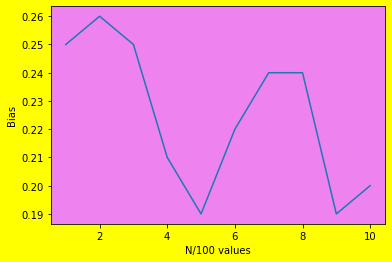

In [50]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor("violet")
plt.plot(np.arange(0,10,1)+1, bias)
plt.xlabel('N/100 values') # X-Label
plt.ylabel('Bias') # Y-Label
# show() is used for displaying the plot
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error 
var = []
for i in range(10):
    mse=mean_squared_error(test[:,2],predict_nnc(test[:,0:2],i+1))
    var.append(mse-(np.square(bias[i])))

# print(var)

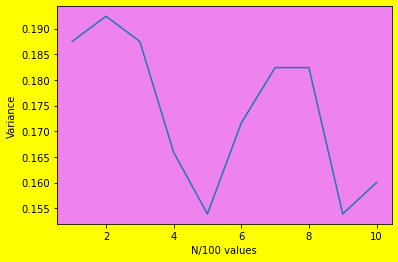

In [62]:
plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor("violet")
plt.plot(np.arange(0,10,1)+1, var)
plt.xlabel('N/100 values') # X-Label
plt.ylabel('Variance') # Y-Label
# show() is used for displaying the plot
plt.show()

In [63]:
print(var)

[0.1875, 0.19240000000000002, 0.1875, 0.1659, 0.1539, 0.1716, 0.1824, 0.1824, 0.1539, 0.16]


In [64]:
print(bias)

[0.25, 0.26, 0.25, 0.21, 0.19, 0.22, 0.24, 0.24, 0.19, 0.2]


In [66]:
print(np.subtract(bias, var))

[0.0625 0.0676 0.0625 0.0441 0.0361 0.0484 0.0576 0.0576 0.0361 0.04  ]
